## **Notebook EC05**
## Convolutional classifier for the MNIST and CIFAR-10 database.
**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):** Daniele Souza Gonçalves RA:248029


MNIST

In [ ]:
import tensorflow as tf
import os
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

# Reshape to be [samples][width][height][channels]
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                                 activation='relu',
                                 input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10)
model.summary()

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test)
print("test loss, test acc:", results)

# Saving the model to disk
model_json = model.to_json()
json_file = open("model_CNN.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("model_CNN.h5")
print("Model saved to disk")
os.getcwd()

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 94s 50ms/step - loss: 0.1898 - accuracy: 0.9430
Epoch 2/10
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0818 - accuracy: 0.9752
Epoch 3/10
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0612 - accuracy: 0.9819
Epoch 4/10
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0508 - accuracy: 0.9841
Epoch 5/10
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0402 - accuracy: 0.9874
Epoch 6/10
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0366 - accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0330 - accuracy: 0.9897
Epoch 8/10
1875/1875 [==============================] - 93s 50ms/step - loss: 0.0291 - accuracy: 0.9903
Epoch 9/10
1875/1875 [==============================] - 91s 49ms/step - loss: 0.0267 - accuracy: 0.9918

'/content'

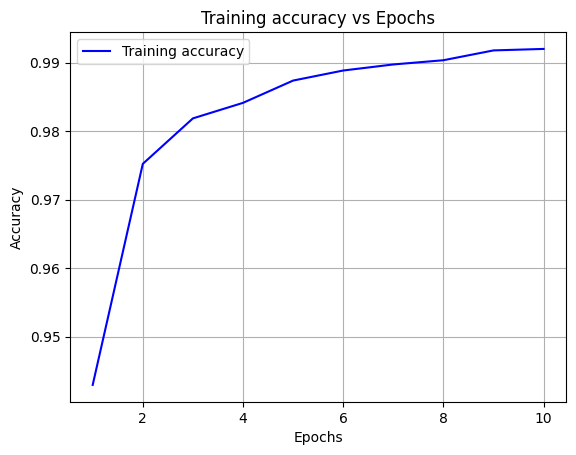

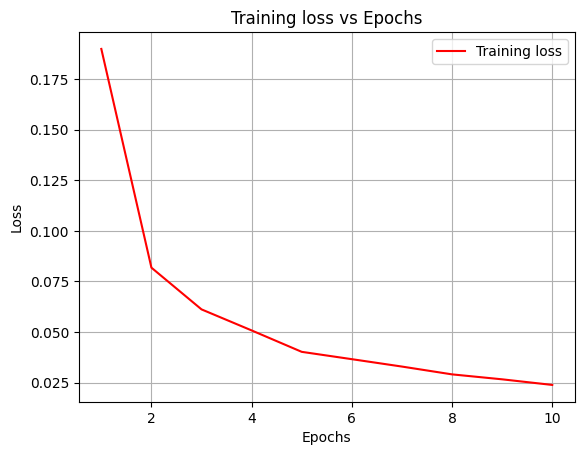

In [ ]:
# Behavior along the training process
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy vs Epochs')
plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training loss vs Epochs')
plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

CIFAR-10

In [ ]:
import tensorflow as tf
import os
mnist = tf.keras.datasets.cifar10

(x_train, y_train),(x_test, y_test) = mnist.load_data()

# Reshape to be [samples][width][height][channels]
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                                 activation='relu',
                                 input_shape=(32, 32, 3)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10)
model.summary()

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test)
print("test loss, test acc:", results)

# Saving the model to disk
model_json = model.to_json()
json_file = open("model_CNN.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("model_CNN.h5")
print("Model saved to disk")
os.getcwd()

Epoch 1/10
1563/1563 [==============================] - 186s 118ms/step - loss: 1.5977 - accuracy: 0.4196
Epoch 2/10
1563/1563 [==============================] - 179s 114ms/step - loss: 1.2875 - accuracy: 0.5392
Epoch 3/10
1563/1563 [==============================] - 183s 117ms/step - loss: 1.1751 - accuracy: 0.5842
Epoch 4/10
1563/1563 [==============================] - 178s 114ms/step - loss: 1.0921 - accuracy: 0.6124
Epoch 5/10
1563/1563 [==============================] - 184s 118ms/step - loss: 1.0287 - accuracy: 0.6346
Epoch 6/10
1563/1563 [==============================] - 191s 122ms/step - loss: 0.9800 - accuracy: 0.6544
Epoch 7/10
1563/1563 [==============================] - 185s 118ms/step - loss: 0.9300 - accuracy: 0.6717
Epoch 8/10
1563/1563 [==============================] - 180s 115ms/step - loss: 0.8857 - accuracy: 0.6840
Epoch 9/10
1563/1563 [==============================] - 179s 114ms/step - loss: 0.8473 - accuracy: 0.6944
Epoch 10/10
1563/1563 [=======================

'/content'

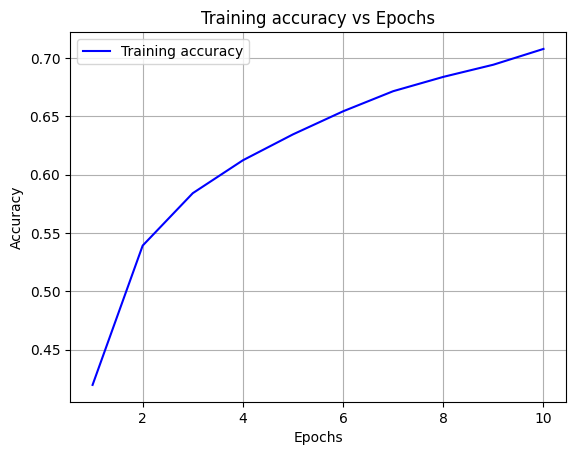

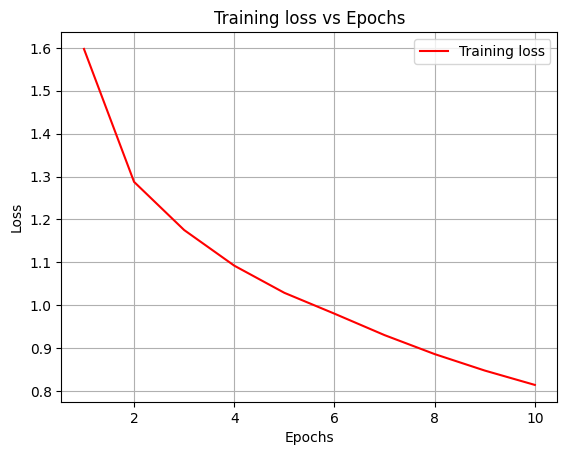

In [ ]:
# Behavior along the training process
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy vs Epochs')
plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training loss vs Epochs')
plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
# Summary of the obtained results for the MNIST database (EC1 to EC5)
classifier1 = 'Linear           '
classifier2 = 'ELM              '
classifier3 = 'MLP              '
classifier4 = 'CNN              '
print('--------------------------------------------------')
print('|       Accuracy for the MNIST database          |')
print('--------------------------------------------------')
print('|Classifier type \t Accuracy                |')
print('--------------------------------------------------')
print('| %s: \t\t\t%f |'% (classifier1,0.8561))
print('| %s: \t\t\t%f |'% (classifier2,0.9391))
print('| %s: \t\t\t%f |'% (classifier3,0.9836))
print('| %s: \t\t\t%f |'% (classifier4,0.9905))
print('--------------------------------------------------')

--------------------------------------------------
|       Accuracy for the MNIST database          |
--------------------------------------------------
|Classifier type 	 Accuracy                |
--------------------------------------------------
| Linear           : 			0.856100 |
| ELM              : 			0.939100 |
| MLP              : 			0.983600 |
| CNN              : 			0.990500 |
--------------------------------------------------


In [ ]:
# Summary of the obtained results for the CIFAR10 database (EC1 to EC5)
classifier1 = 'Linear           '
classifier2 = 'ELM              '
classifier3 = 'MLP              '
classifier4 = 'CNN              '
print('--------------------------------------------------')
print('|      Accuracy for the CIFAR10 database         |')
print('--------------------------------------------------')
print('|Classifier type \t Accuracy                |')
print('--------------------------------------------------')
print('| %s: \t\t\t%f |'% (classifier1,0.3781))
print('| %s: \t\t\t%f |'% (classifier2,0.4650))
print('| %s: \t\t\t%f |'% (classifier3,0.4591))
print('| %s: \t\t\t%f |'% (classifier4,0.6941))
print('--------------------------------------------------')

--------------------------------------------------
|      Accuracy for the CIFAR10 database         |
--------------------------------------------------
|Classifier type 	 Accuracy                |
--------------------------------------------------
| Linear           : 			0.378100 |
| ELM              : 			0.465000 |
| MLP              : 			0.459100 |
| CNN              : 			0.694100 |
--------------------------------------------------


Resposta

Como podemos observar pelas tabelas acima, para ambos os conjuntos de dados a acurácia sobe a medida que aumentamos a complexidade do modelo. No entanto, mesmo para o modelo mais complexo (CNN) o CIFAR-10 não conseguiu atingir um desempenho semelhante ao MNIST se comparado a sua execução no modelo mais simples (Linear EC01). Fato esse explicado pela complexidade maior do CIFAR-10 devido as cores, ao tamanho e rotações das imagens do conjunto. Além disso, podemos notar que para o CIFAR-10 a ELM e a MLP tem desempenhos muito próximos, tendo ELM um desempenho ligeiramente melhor nesse caso.